# Logistic Regression

- Model machine learning yang digunakan untuk task klasifikasi.
- Digunakan untuk klasifikasi biner (2 kelas).

- Formula Dasar:
    - Simple Linear Regression:
        - $y\ =\ \alpha + \beta x$
        - $g(x)\ =\ \alpha + \beta x$
        
    - Multiple Linear Regression:
        - $y\ =\ \alpha + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$
        - $g(X)\ =\ \alpha + \beta X$
    - Logistic Regression:
        - $g(X)\ =\ sigmoid(\alpha + \beta X)$
        - $sigmoid(x)\ =\ \frac{1}{1 + e^{-x}}$
<img src="../images/sigmoid_function.png" width="500">

# Dataset: SMS Spam Colection Dataset

In [1]:
import pandas as pd

sms_spam_df = pd.read_csv(
    filepath_or_buffer="../dataset/smsspamcollection/SMSSpamCollection",
    sep="\t",
    header=None,
    names=["label", "sms"]
)

sms_spam_df.sample(n=5)

,label,sms
2968,ham,NEFT Transaction with reference number &lt;#&...
2820,ham,Don't forget who owns you and who's private pr...
4186,ham,I'm good. Have you registered to vote?
809,ham,I am taking half day leave bec i am not well
2311,spam,You have won a Nokia 7250i. This is what you g...


In [2]:
sms_spam_df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Training and Testing Dataset

In [3]:
from sklearn.preprocessing import LabelBinarizer

X = sms_spam_df["sms"].values
y = sms_spam_df["label"].values

label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y).ravel()
label_binarizer.classes_

array(['ham', 'spam'], dtype='<U4')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Train Set")
print(f"{X_train[:5]}")
print(f"{y_train[:5]}\n")

print("-" * 50)

print(f"\nTest Set")
print(f"{X_test[:5]}")
print(f"{y_test[:5]}")

Train Set
['WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'
 "So how's scotland. Hope you are not over showing your JJC tendencies. Take care. Live the dream"
 'when you and derek done with class?' "Aight, lemme know what's up"
 'Yo we are watching a movie on netflix']
[1 0 0 0 0]

--------------------------------------------------

Test Set
['Squeeeeeze!! This is christmas hug.. If u lik my frndshp den hug me back.. If u get 3 u r cute:) 6 u r luvd:* 9 u r so lucky;) None? People hate u:'
 "And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed"
 'Mmm thats better now i got a roast down me! i\x92d b better if i had a few drinks down me 2! Good indian?'
 'Mm have some kanji dont eat anything heavy ok'
 "So there's a ring that comes with the guys costumes. It's there so they can gift their future yowifes. Hint hint"]

# Feature Extraction dengan TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(stop_words="english")

X_train_tfidf = tf_idf_vectorizer.fit_transform(X_train)
X_train_tfidf_df = str(X_train_tfidf).split("\n")
X_train_tfidf_df = [data.strip() for data in X_train_tfidf_df]
X_train_tfidf_df = [data.replace("(", "") for data in X_train_tfidf_df]
X_train_tfidf_df = [data.replace(")", "") for data in X_train_tfidf_df]
X_train_tfidf_df = [data.replace(" ", "") for data in X_train_tfidf_df]
X_train_tfidf_df = [data.replace("\t", ",") for data in X_train_tfidf_df]
X_train_tfidf_df = [data.split(",") for data in X_train_tfidf_df]

X_train_tfidf_df = pd.DataFrame(
    data=X_train_tfidf_df,
    columns=["idx_doc", "idx_token", "tf_idf"]
)

X_test_tfidf = tf_idf_vectorizer.transform(X_test)
X_test_tfidf_df = str(X_test_tfidf).split("\n")
X_test_tfidf_df = [data.strip() for data in X_test_tfidf_df]
X_test_tfidf_df = [data.replace("(", "") for data in X_test_tfidf_df]
X_test_tfidf_df = [data.replace(")", "") for data in X_test_tfidf_df]
X_test_tfidf_df = [data.replace(" ", "") for data in X_test_tfidf_df]
X_test_tfidf_df = [data.replace("\t", ",") for data in X_test_tfidf_df]
X_test_tfidf_df = [data.split(",") for data in X_test_tfidf_df]
X_test_tfidf_df = pd.DataFrame(
    data=X_test_tfidf_df,
    columns=["idx_doc", "idx_token", "tf_idf"]
)

X_train_tfidf_df.head()

,idx_doc,idx_token,tf_idf
0,0,3270,0.22054637918276537
1,0,268,0.24268694798090706
2,0,6771,0.22054637918276537
3,0,3684,0.29820405490236296
4,0,1760,0.2170940285037797


In [6]:
X_test_tfidf_df.head()

,idx_doc,idx_token,tf_idf
0,0,4798,0.2249854341740055
1,0,3979,0.28142633196821903
2,0,3839,0.3091529161984464
3,0,3289,0.6591729096397505
4,0,3128,0.32958645481987525


# Klasifikasi Biner dengan Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(X_train_tfidf, y_train)
y_pred = lg_model.predict(X_test_tfidf)

for pred, sms in zip(y_pred[:5], X_test[:5]):
    print(f"Pred: {pred} - {sms}\n")

Pred: 0 - Squeeeeeze!! This is christmas hug.. If u lik my frndshp den hug me back.. If u get 3 u r cute:) 6 u r luvd:* 9 u r so lucky;) None? People hate u:

Pred: 0 - And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed

Pred: 0 - Mmm thats better now i got a roast down me! id b better if i had a few drinks down me 2! Good indian?

Pred: 0 - Mm have some kanji dont eat anything heavy ok

Pred: 0 - So there's a ring that comes with the guys costumes. It's there so they can gift their future yowifes. Hint hint



# Evaluation

- Terminologi Dasar:
    - TP (True Positive): model telah dengan benar memprediksi kelas positif sebagai positif.
    - TN (True Negative): model telah dengan benar memprediksi kelas negatif sebagai negatif.
    - FP (False Positive): model telah dengan keliru memprediksi kelas negatif sebagai positif.
    - FN (False Negative): model telah dengan keliru memprediksi kelas positif sebagai negatif.


- Metrik:
    - Confusion Matrix
    - Accuracy
    - Precision and Recall
    - F1 Score
    - ROC

## Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1207,    0],
       [  45,  141]], dtype=int64)

In [9]:
sms_spam_df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
print(f"True Positif  : {matrix[1, 1]}")
print(f"True Negatif  : {matrix[0, 0]}")
print(f"False Positif : {matrix[0, 1]}")
print(f"False Negatif : {matrix[1, 0]}")

True Positif  : 141
True Negatif  : 1207
False Positif : 0
False Negatif : 45


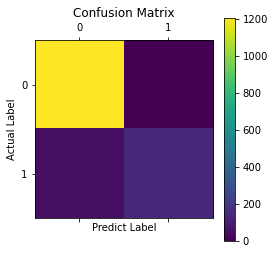

In [11]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title("Confusion Matrix")
plt.xlabel("Predict Label")
plt.ylabel("Actual Label")
plt.show()

## Accuracy

- Evaluasi dengan membandingkan semua prediksi yang tepat dengan keseluruhan prediksi.
- $accuracy\ =\ \frac{TP+TN}{TP+TN+FP+FN}\ =\ \frac{correct}{total}$

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9676956209619526

## Precision

- Dari data yang diprediksi positif, berapa banyak yang benar.
- $precision\ =\ \frac{TP}{TP + FP}$

In [13]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

1.0

## Recall

- Dari data yang berlabel positif (actual), berapa banyak yang diprediksi benar.
- $recall\ =\ \frac{TP}{TP + FN}$

In [14]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7580645161290323

## F1 Score

- Rata-rata harmonik dari precision dan recall.
- $F1\text{-}score\ =\ 2\ \times\ \frac{precision\ \times\ recall}{precision\ +\ recall}$ 

In [15]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8623853211009175

## RCO (Receiver Operating Chsracteristic)

- Membandingkan nilai recall (TPR) dan fallout (FPR).
- $TPR\ =\ \frac{TP}{TP\ +\ FN}$
- $FPR\ =\ \frac{FP}{TN\ +\ FP}$

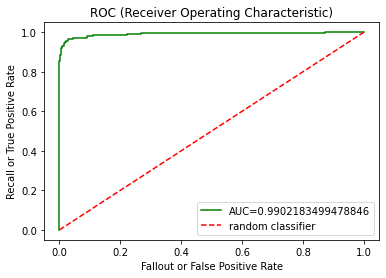

In [28]:
from sklearn.metrics import roc_curve, auc

prob_estimates = lg_model.predict_proba(X_test_tfidf)
fpr, tpr, threshold = roc_curve(y_test, prob_estimates[:, 1])
auc_score = auc(fpr, tpr)

plt.title("ROC (Receiver Operating Characteristic)")
plt.xlabel("Fallout or False Positive Rate")
plt.ylabel("Recall or True Positive Rate")
plt.plot(fpr, tpr, "g", label=f"AUC={auc_score}")
plt.plot([0, 1], [0, 1], "--r", label=f"random classifier")
plt.legend()
plt.show()